# Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [1]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('lab13_files/breast-cancer')
X = X.toarray()

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [2]:
import numpy as np

In [3]:
# y = np.where(y == 2, -1, y)
# y = np.where(y == 4, 1, y)

# wykonuję przenurowanie jednocześnie dla dwóch wartości dlatego, że wiadomo, że w zbiorze y nie ma innych niż 2 i 4
y = np.where(y == 2, -1, 1)
y

array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1

In [4]:
def normalize(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0)) 

X = normalize(X)
X

array([[0.06994635, 0.44444444, 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.07016441, 0.44444444, 0.33333333, ..., 0.22222222, 0.11111111,
        0.        ],
       [0.07109638, 0.22222222, 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.06164188, 0.44444444, 1.        , ..., 0.77777778, 1.        ,
        0.11111111],
       [0.06228791, 0.33333333, 0.77777778, ..., 1.        , 0.55555556,
        0.        ],
       [0.06228791, 0.33333333, 0.77777778, ..., 1.        , 0.33333333,
        0.        ]])

### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

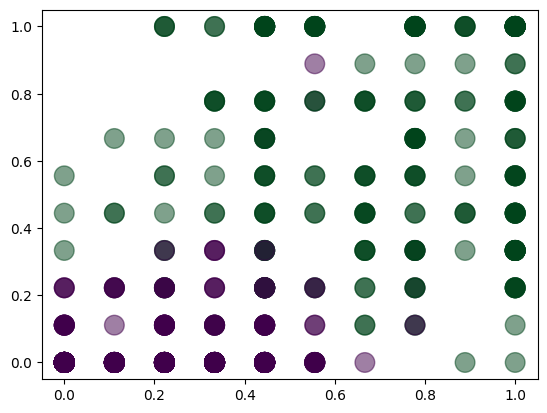

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], X[:, 2], c=y, cmap='PRGn', s=200, alpha=0.5)
plt.show()

### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [6]:
def linear_regression(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

beta = linear_regression(X, y)

### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

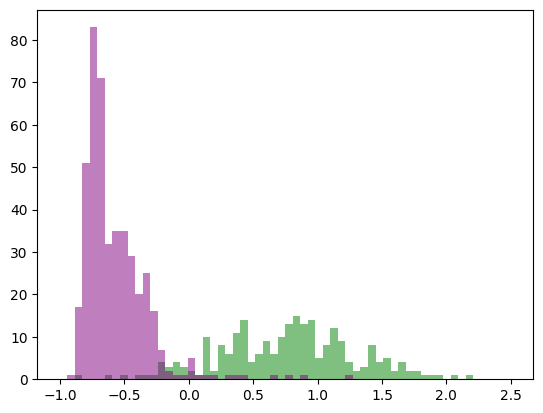

In [7]:
X_pos = X[y == 1]
X_neg = X[y == -1]

plt.hist(beta @ X_pos.T, range=[-1.0, 2.5], color='green', alpha=0.5, bins=60)
plt.hist(beta @ X_neg.T, range=[-1.0, 2.5], color='purple', alpha=0.5, bins=60)

plt.show()


### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [9]:
def classify(beta, X):
    y_pred = beta @ X.T
    y_pred = np.where(y_pred < 0, -1, 1)

    return y_pred

y_pred = classify(beta, X)

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [10]:
def calc_accuracy(y_pred, y):
    return len(y_pred[y_pred == y]) / len(y_pred) * 100

accuracy = calc_accuracy(classify(beta, X), y)
print(f"Dokładność modelu: {accuracy:3.2f}%")


Dokładność modelu: 94.88%


### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [11]:
def lr_with_regularization(X, y, C):
    return np.linalg.inv(X.T @ X + 1/C * np.identity(X.shape[1])) @ X.T @ y


C = [0.001, 0.01, 0.1, 1, 10, 100]
max = (0, 0)

for param in C:
    beta_prim = lr_with_regularization(X, y, param)
    y_pred = classify(beta_prim, X)

    acc = calc_accuracy(y_pred, y)
    print(f"C= {param}, accuracy: {acc}")

    if max[1] < acc:
        max = param, acc

print(f"\nWynik jest najlepszy dla c={max[0]}, dokładność modelu wynosi: {max[1]:3.2f}%")



C= 0.001, accuracy: 36.01756954612006
C= 0.01, accuracy: 87.99414348462665
C= 0.1, accuracy: 93.55783308931186
C= 1, accuracy: 95.02196193265007
C= 10, accuracy: 94.87554904831626
C= 100, accuracy: 94.87554904831626

Wynik jest najlepszy dla c=1, dokładność modelu wynosi: 95.02%


### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

In [12]:
from sklearn import datasets
iris = datasets.load_iris()

In [13]:
X_iris = iris["data"]
y_iris = np.where(iris["target"] == 2, "Iris-Virginica", "Not Iris-Virginica" )

print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.33, random_state=42)

In [20]:
# zadanie zostanie wykonane z użyciem klasy LRClassifier 
# (zaimplementowanej niżej, w ramach zadania dodatkowego)

C = [0.001, 0.01, 0.1, 1, 10, 100]
max = (0, 0)

for param in C:
    clf_iris = LRClassifier(C=param)
    clf_iris.fit(X_train, y_train)
    y_pred = clf_iris.predict(X_test)
    
    acc = calc_accuracy(y_pred, y_test)
    print(f"C= {param}, accuracy: {acc}")

    if max[1] < acc:
        max = param, acc

print(f"\nWynik jest najlepszy dla c={max[0]}, dokładność modelu na zbiorze testowym wynosi: {max[1]:3.2f}%")

C= 0.001, accuracy: 68.0
C= 0.01, accuracy: 68.0
C= 0.1, accuracy: 68.0
C= 1, accuracy: 88.0
C= 10, accuracy: 96.0
C= 100, accuracy: 92.0

Wynik jest najlepszy dla c=10, dokładność modelu na zbiorze testowym wynosi: 96.00%


### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']

In [15]:
class LRClassifier:
    def __init__(self, C, scale=True):
        self.C = C
        self.scale = scale
        self.beta = None
        self.labels = None

    def _normalize(self, X):
        return X / np.linalg.norm(X, axis=0)

    def fit(self, X, y):
        if self.scale:
            X = self._normalize(X)

        self.labels = np.unique(y)
        y = np.where(y == self.labels[0], -1, 1)

        self.beta = np.linalg.inv(X.T @ X + 1/self.C * np.identity(X.shape[1])) @ X.T @ y


    def predict(self, X):
        if self.scale:
            X = self._normalize(X)
            
        y_pred = self.beta @ X.T
        y_pred = np.where(y_pred < 0, self.labels[0], self.labels[1])

        return y_pred


In [16]:
clf = LRClassifier(C=100)
Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
yt = np.array(['x', 'x', 'y', 'y', 'y'])
clf.fit(Xt, yt)
X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
print(clf.predict(X)) # ['x', 'x', 'y']

['x' 'x' 'y']
